In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import data
crude_oil = pd.read_csv(r"crude-oil-price.csv")
#view data shape and table of data
print(f"this data contains {crude_oil.shape}, rows and columns")
crude_oil.head()

this data contains (491, 4), rows and columns


,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646,1.36
2,1983-05-02T00:00:00,30.25,-1.241,-0.38
3,1983-06-01T00:00:00,31.38,3.736,1.13
4,1983-07-01T00:00:00,32.00,1.976,0.62


In [2]:
#show categorical and numeric variables
crude_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           491 non-null    object 
 1   price          491 non-null    float64
 2   percentChange  490 non-null    float64
 3   change         490 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.5+ KB


In [3]:
#convert date column to date format
crude_oil["date"] = pd.to_datetime(crude_oil["date"])

In [4]:
#view changes
crude_oil.head()

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646,1.36
2,1983-05-02,30.25,-1.241,-0.38
3,1983-06-01,31.38,3.736,1.13
4,1983-07-01,32.00,1.976,0.62


In [5]:
#view data NaN
crude_oil.isnull().sum()

date             0
price            0
percentChange    1
change           1
dtype: int64

In [6]:
#drop null values
crude_oil.dropna(inplace=True)
crude_oil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 1 to 490
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           490 non-null    datetime64[ns]
 1   price          490 non-null    float64       
 2   percentChange  490 non-null    float64       
 3   change         490 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 19.1 KB


In [7]:
#stat information of data
crude_oil.describe()

,date,price,percentChange,change
count,490,490.00000,490.000000,490.000000
mean,2003-08-17 06:33:47.755102080,45.83328,0.727065,0.088852
min,1983-04-04 00:00:00,10.42000,-54.245000,-32.830000
25%,1993-06-08 12:00:00,20.41250,-5.292000,-1.715000
50%,2003-08-17 00:00:00,32.87500,0.924500,0.260000
75%,2013-10-24 06:00:00,68.16000,6.360750,2.332500
max,2024-01-02 00:00:00,140.00000,88.376000,16.650000
std,NaN,28.95776,10.532872,4.968952


In [8]:
print(f"the shape data before drop duplicate row is: {crude_oil.shape}")
#drop duplicates
crude_oil.drop_duplicates(inplace=True)
print(f"the shape data before drop duplicate row is: {crude_oil.shape}")

the shape data before drop duplicate row is: (490, 4)
the shape data before drop duplicate row is: (490, 4)


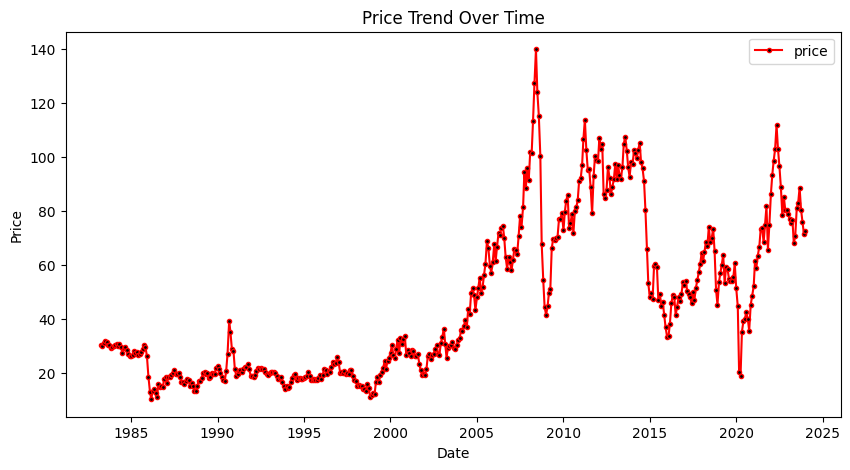

In [9]:
#time series graphic
plt.figure(figsize=(10, 5))
plt.plot(crude_oil["date"], crude_oil["price"], marker=".", color="r", markerfacecolor="k", label="price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Trend Over Time")
plt.legend()
plt.show()

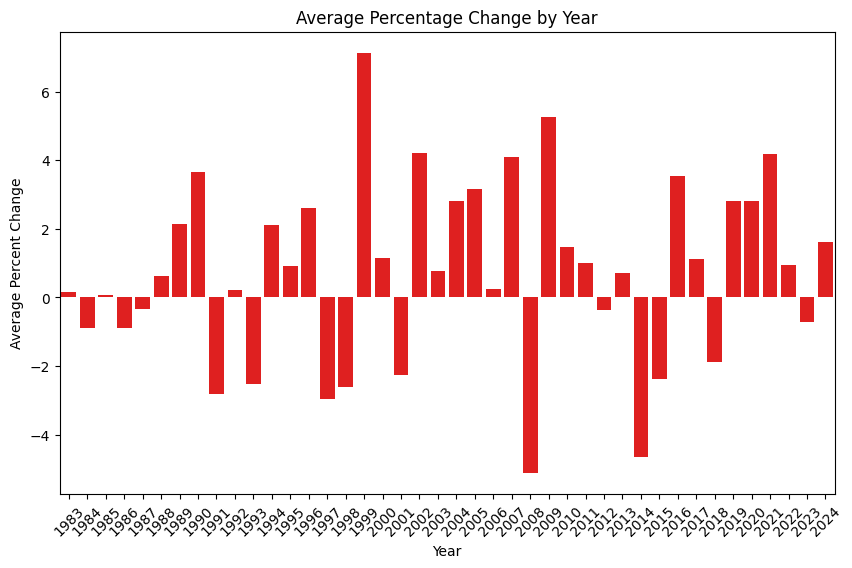

In [10]:
#Extract the year from the 'date' column
crude_oil['year'] = crude_oil['date'].dt.year
#Calculate the mean percentage change grouped by year
mean_percent_change = crude_oil.groupby('year')['percentChange'].mean().reset_index()
#Bar chart for percentage change grouped by year
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_percent_change['year'], y=mean_percent_change['percentChange'], color='r')
plt.xlabel('Year')
plt.ylabel('Average Percent Change')
plt.title('Average Percentage Change by Year')
plt.xticks(rotation=45)
plt.show()

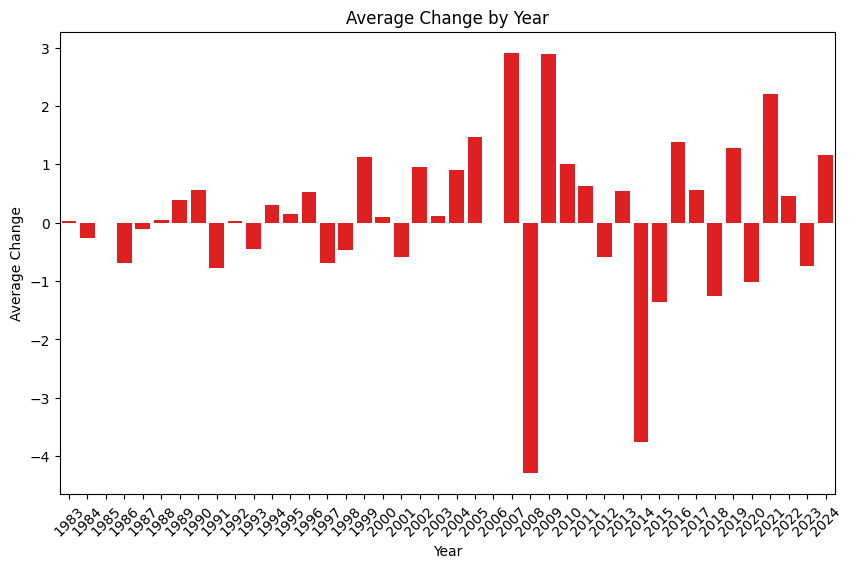

In [11]:
#Calculate the mean percentage change grouped by year
mean_change = crude_oil.groupby('year')['change'].mean().reset_index()
#Bar chart for change grouped by year
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_change['year'], y=mean_change['change'], color='r')
plt.xlabel('Year')
plt.ylabel('Average Change')
plt.title('Average Change by Year')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Convert the date to a numeric value representing the days since a reference date
crude_oil['date'] = pd.to_datetime(crude_oil['date'])
crude_oil['days_since_start'] = (crude_oil['date'] - crude_oil['date'].min()).dt.days

# Define the independent (X) and dependent (Y) variables
X = crude_oil[['percentChange', 'change', 'days_since_start']]
y = crude_oil['price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
#bulding the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation="relu", input_shape=(3,)),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(1)
])

c:\Users\jchav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#compiling model
model.compile(optimizer="adam", loss='mean_squared_error',metrics=['mean_absolute_error'])
#train data
model.fit(X_train, y_train, epochs=1000)
#test data this line evaluate loss with x_test and accuracy with y_test
loss, mas = model.evaluate(X_test, y_test)
#show results
print(f"the Loss result is {loss} \nthe Mean Absolute Error result is {mas}")

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3240.1372 - mean_absolute_error: 47.9512
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2694.7173 - mean_absolute_error: 43.4248 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 2718.3118 - mean_absolute_error: 43.5133
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 1731.7697 - mean_absolute_error: 30.4517
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 802.8236 - mean_absolute_error: 20.3024
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 691.8441 - mean_absolute_error: 16.6264
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 505.1803 - mean_absolute_error: 15.8814
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 521.6272 - mean_absolute_error: 15.8480
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 443.9469 - mean_absolute_error: 14.2362
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 511.2039 - mean_ab

In [15]:
#prediction
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [16]:
#show prediction
for i in range(min(10, len(y_test))):
    print(f"Prection: {predictions[i]}, Real value: {y_test.values[i]}")

Prection: [50.95049], Real value: 48.52
Prection: [18.807512], Real value: 18.54
Prection: [60.148273], Real value: 59.4601
Prection: [75.94561], Real value: 78.72
Prection: [45.641872], Real value: 45.41
Prection: [61.98889], Real value: 51.12
Prection: [27.622278], Real value: 30.38
Prection: [26.615847], Real value: 27.2
Prection: [83.89792], Real value: 81.32
Prection: [27.48796], Real value: 27.02
